# **Maestr√≠a en Inteligencia Artificial Aplicada**

## **Curso: Operaciones de aprendizaje autom√°tico (Gpo 10)**

**Tecnol√≥gico de Monterrey**

Dr. Gerardo Rodr√≠guez Hern√°ndez
Maestro Ricardo Valdez Hern√°ndez

### **Actividad: Fase 1 | Avance de Proyecto

**Nombre:** Manuel Alejandro Ambriz Baca

**Matr√≠cula:** A01686824

**Rol:** Data engineer

* #### **Nombre:** Lucero Guadalupe Contreras Hern√°ndez
* #### **Matr√≠cula:** A01794502
* #### **Rol:** Data scientist

* #### **Nombre:** Manuel Alejandro Ambriz Baca
* #### **Matr√≠cula:** A01686824
* #### **Rol:** Data Engineer

* #### **Nombre:** Angel Adrian Morales Aldaco
* #### **Matr√≠cula:** A01797072
* #### **Rol:** ML Engineer

* #### **Nombre:** Alberto Cort√©s Murillo
* #### **Matr√≠cula:** A00739034
* #### **Rol:** DevOps


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

## Configuraci√≥n b√°sica

In [ ]:


IN_FILE = "/content/drive/MyDrive/OperacionesML/Fase1/data/raw/german_credit_modified.csv"
OUT_DIR = Path("/content/drive/MyDrive/OperacionesML/Fase1/data/interim")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# Dominios v√°lidos (categ√≥ricas codificadas)
VALID = {
  "laufkont":{1,2,3,4}, "moral":{0,1,2,3,4}, "verw":set(range(0,11)), "sparkont":{1,2,3,4,5},
  "beszeit":{1,2,3,4,5}, "rate":{1,2,3,4}, "famges":{1,2,3,4}, "buerge":{1,2,3},
  "wohnzeit":{1,2,3,4}, "verm":{1,2,3,4}, "weitkred":{1,2,3}, "wohn":{1,2,3},
  "bishkred":{1,2,3,4}, "beruf":{1,2,3,4}, "pers":{1,2}, "telef":{1,2}, "gastarb":{1,2},
  "kredit":{0,1}
}

# Continuas y rangos v√°lidos
CONT = ["hoehe","laufzeit","alter"]
RANGE = {"alter":(18,75), "laufzeit":(4,72), "hoehe":(250,None)}

def brief(df, title="DF"):
    print(f"‚Äî {title} ‚Äî shape={df.shape}, nans={int(df.isna().sum().sum())}, dups={df.duplicated().sum()}")


## Carga y chequeo inicial

In [ ]:
df = pd.read_csv(IN_FILE)

# eliminar si existe columna ‚Äúruidosa‚Äù
if "mixed_type_col" in df.columns:
    df = df.drop(columns=["mixed_type_col"])

brief(df, "Cargado")

# Vistazo r√°pido
display(df.head(3))
print("\nTipos:")
print(df.dtypes)
print("\n% faltantes (top 10):")
print((df.isna().mean()*100).round(2).sort_values(ascending=False).head(10))


‚Äî Cargado ‚Äî shape=(1020, 21), nans=247, dups=2


laufkont laufzeit moral verw   hoehe sparkont beszeit rate famges buerge  \
0      1.0     18.0   4.0  2.0  1049.0      1.0     2.0  4.0    2.0    1.0   
1      1.0      9.0   4.0  0.0  2799.0      1.0     3.0  2.0    3.0    1.0   
2      2.0    12.0    2.0  9.0   841.0      2.0     4.0  2.0    2.0    1.0   

   ... verm alter weitkred wohn bishkred beruf pers telef gastarb kredit  
0  ...  2.0  21.0      3.0  1.0      1.0   3.0  2.0   1.0     2.0    1.0  
1  ...  1.0  36.0      3.0  1.0      2.0   3.0  1.0   1.0     2.0    1.0  
2  ...  1.0  23.0      3.0  1.0      1.0   2.0  2.0   1.0     2.0    1.0  

[3 rows x 21 columns]


Tipos:
laufkont    object
laufzeit    object
moral       object
verw        object
hoehe       object
sparkont    object
beszeit     object
rate        object
famges      object
buerge      object
wohnzeit    object
verm        object
alter       object
weitkred    object
wohn        object
bishkred    object
beruf       object
pers        object
telef       object
gastarb     object
kredit      object
dtype: object

% faltantes (top 10):
moral       1.67
beszeit     1.67
verw        1.57
kredit      1.57
laufkont    1.47
gastarb     1.47
wohnzeit    1.47
buerge      1.27
beruf       1.18
bishkred    1.18
dtype: float64


## Forzar num√©rico + validaci√≥n de dominios/c√≥digos

In [ ]:
# Forzar num√©rico donde haya strings de n√∫meros
for c in df.columns:
    if df[c].dtype == "O":
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Contar c√≥digos inv√°lidos y convertirlos a NaN
invalid_counts = {}
for col, ok in VALID.items():
    if col in df.columns:
        m = df[col].notna() & ~df[col].isin(ok)
        invalid_counts[col] = int(m.sum())
        df.loc[m, col] = np.nan

print("C√≥digos inv√°lidos (solo no-cero):", {k:v for k,v in invalid_counts.items() if v})
brief(df, "Tras coerci√≥n + dominios")


C√≥digos inv√°lidos (solo no-cero): {'laufkont': 13, 'moral': 18, 'verw': 9, 'sparkont': 9, 'beszeit': 7, 'rate': 4, 'famges': 5, 'buerge': 12, 'wohnzeit': 10, 'verm': 8, 'weitkred': 10, 'wohn': 9, 'bishkred': 14, 'beruf': 17, 'pers': 14, 'telef': 5, 'gastarb': 13, 'kredit': 8}
‚Äî Tras coerci√≥n + dominios ‚Äî shape=(1020, 21), nans=506, dups=7


## Reglas de rango + outliers en ‚Äòhoehe‚Äô (IQR con piso)

In [ ]:
# Reglas de rango (se dejan como NaN lo fuera de rango)
for col,(lo,hi) in RANGE.items():
    if col in df.columns:
        if lo is not None: df.loc[df[col] < lo, col] = np.nan
        if hi is not None: df.loc[df[col] > hi, col] = np.nan

# Filtrado IQR en 'hoehe' con piso HOEHE>=250
removed_iqr = 0
if "hoehe" in df.columns and df["hoehe"].notna().any():
    s = df["hoehe"].dropna()
    q1,q3 = s.quantile([.25,.75]); iqr = q3-q1
    low, high = max(q1-1.5*iqr, 250), q3+1.5*iqr
    m = df["hoehe"].between(low, high)
    removed_iqr = int((~m).sum())
    df = df[m].copy()

print(f"Outliers eliminados en 'hoehe' por IQR: {removed_iqr}")
brief(df, "Tras rangos + IQR")


Outliers eliminados en 'hoehe' por IQR: 88
‚Äî Tras rangos + IQR ‚Äî shape=(932, 21), nans=463, dups=6


## Target binario consistente + imputaciones simples

In [ ]:
# Mapear target a 'target_bad' (1 = malo, 0 = bueno)
if "kredit" not in df.columns:
    raise ValueError("Falta columna 'kredit' (target)")

df["target_bad"] = df["kredit"].map({1:0, 0:1}).astype("Int64")

# Imputaciones: medianas para continuas, moda para categ√≥ricas
df_imp = df.copy()
for c in df_imp.columns:
    if c == "target_bad":
        continue
    if c in CONT:
        df_imp[c] = df_imp[c].fillna(df_imp[c].median())
    else:
        moda = df_imp[c].mode(dropna=True)
        if not moda.empty:
            df_imp[c] = df_imp[c].fillna(moda.iloc[0])

# Opcional: quitar la columna original 'kredit' (ya tenemos target_bad)
if "kredit" in df_imp.columns:
    df_imp = df_imp.drop(columns=["kredit"])

brief(df_imp, "Tras imputaci√≥n")
print("Distribuci√≥n target_bad (proporci√≥n):")
print(df_imp["target_bad"].value_counts(normalize=True).round(3))


‚Äî Tras imputaci√≥n ‚Äî shape=(932, 21), nans=23, dups=9
Distribuci√≥n target_bad (proporci√≥n):
target_bad
0    0.715
1    0.285
Name: proportion, dtype: Float64


## Duplicados (exactos y conflictivos)

In [ ]:
before = len(df_imp)
df_imp = df_imp.drop_duplicates().reset_index(drop=True)
removed_exact = before - len(df_imp)

# Duplicados conflictivos: mismas features con distinto target
feats = [c for c in df_imp.columns if c != "target_bad"]
g = df_imp.groupby(feats, dropna=False)["target_bad"].nunique()
conflict_keys = set(g[g > 1].index)

removed_conflict = 0
if conflict_keys:
    df_imp["__key__"] = list(map(tuple, df_imp[feats].values))
    keep_mask = ~df_imp["__key__"].isin(conflict_keys)
    removed_conflict = int((~keep_mask).sum())
    df_imp = df_imp.loc[keep_mask].drop(columns="__key__").reset_index(drop=True)

print(f"Duplicados exactos eliminados: {removed_exact}")
print(f"Duplicados conflictivos eliminados: {removed_conflict}")
brief(df_imp, "Final sin duplicados")


Duplicados exactos eliminados: 9
Duplicados conflictivos eliminados: 0
‚Äî Final sin duplicados ‚Äî shape=(923, 21), nans=23, dups=0


## Guardar + QC r√°pido

In [ ]:


out_csv = OUT_DIR / "german_credit_clean.csv"
out_qc  = OUT_DIR / "qc_report.json"

df_imp.to_csv(out_csv, index=False)

# ---- helpers para JSON seguro ----
def json_key(k):
    # normaliza claves a tipos nativos
    if isinstance(k, (np.integer,)):
        return int(k)
    if isinstance(k, (np.floating,)):
        return float(k)
    if pd.isna(k):
        return "NaN"
    return k

def json_val(v):
    # valores seguros (por si vienen como numpy.*)
    if isinstance(v, (np.integer,)):
        return int(v)
    if isinstance(v, (np.floating,)):
        return float(v)
    return v

# construir QC con claves/valores seguros
missing_pct = {str(k): json_val(v) for k, v in (df_imp.isna().mean()*100).round(2).to_dict().items()}

tb = df_imp["target_bad"].value_counts(normalize=True).round(3).to_dict()
target_balance = {json_key(k): json_val(v) for k, v in tb.items()}

qc = {
    "shape": [int(df_imp.shape[0]), int(df_imp.shape[1])],
    "missing_pct": missing_pct,
    "target_balance": target_balance,
    "dups_remaining": int(df_imp.duplicated().sum())
}

with open(out_qc, "w", encoding="utf-8") as f:
    json.dump(qc, f, indent=2, ensure_ascii=False)

print(f"[OK] Guardado: {out_csv}")
print(json.dumps(qc, indent=2, ensure_ascii=False))


[OK] Guardado: /content/drive/MyDrive/OperacionesML/Fase1/data/interim/german_credit_clean.csv
{
  "shape": [
    923,
    21
  ],
  "missing_pct": {
    "laufkont": 0.0,
    "laufzeit": 0.0,
    "moral": 0.0,
    "verw": 0.0,
    "hoehe": 0.0,
    "sparkont": 0.0,
    "beszeit": 0.0,
    "rate": 0.0,
    "famges": 0.0,
    "buerge": 0.0,
    "wohnzeit": 0.0,
    "verm": 0.0,
    "alter": 0.0,
    "weitkred": 0.0,
    "wohn": 0.0,
    "bishkred": 0.0,
    "beruf": 0.0,
    "pers": 0.0,
    "telef": 0.0,
    "gastarb": 0.0,
    "target_bad": 2.49
  },
  "target_balance": {
    "0": 0.717,
    "1": 0.283
  },
  "dups_remaining": 0
}


## Celda de verificaci√≥n previa al EDA

In [ ]:
path = "/content/drive/MyDrive/OperacionesML/Fase1/data/interim/german_credit_clean.csv"

df = pd.read_csv(path)
print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())
print("\nValores nulos por columna (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))
print("\nDistribuci√≥n target_bad:")
print(df["target_bad"].value_counts(normalize=True).round(3))


Shape: (923, 21)
Columnas: ['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'target_bad']

Valores nulos por columna (top 10):
target_bad    23
laufzeit       0
moral          0
verw           0
laufkont       0
hoehe          0
sparkont       0
rate           0
beszeit        0
buerge         0
dtype: int64

Distribuci√≥n target_bad:
target_bad
0.0    0.717
1.0    0.283
Name: proportion, dtype: float64


## Paths, librer√≠as y semilla

In [ ]:
import os, joblib, textwrap
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             average_precision_score, precision_recall_curve, roc_curve)


BASE = Path("/content/drive/MyDrive/OperacionesML/Fase1")

DVC_DIR  = BASE / "data"                 # datasets versionados
DATA_DIR = DVC_DIR / "interim"            # german_credit_clean.csv esta aqui
ARTI_DIR = BASE / "artifacts"            # para guardar modelos/figuras/m√©tricas
for p in [DATA_DIR, ARTI_DIR, DVC_DIR]: p.mkdir(parents=True, exist_ok=True)

IN_FILE = BASE / "data/interim/german_credit_clean.csv"
RUN_ID = datetime.now().strftime("%Y%m%d_%H%M%S")
RUN_DIR = ARTI_DIR / f"run_{RUN_ID}"
RUN_DIR.mkdir(parents=True, exist_ok=True)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Archivo de entrada:", IN_FILE)
print("Run dir:", RUN_DIR)



Archivo de entrada: /content/drive/MyDrive/OperacionesML/Fase1/data/interim/german_credit_clean.csv
Run dir: /content/drive/MyDrive/OperacionesML/Fase1/artifacts/run_20251012_202156


## Cargar datos y chequeos r√°pidos

In [ ]:


df = pd.read_csv(IN_FILE)
print("Shape:", df.shape)
display(df.head(5))

print("\nTipos:")
display(df.dtypes)

print("\nNulos por columna (top 10):")
display(df.isna().sum().sort_values(ascending=False).head(10))

print("Duplicados:", df.duplicated().sum())
print("\nDistribuci√≥n target_bad:")
display(df["target_bad"].value_counts(normalize=True).round(3))


Shape: (923, 21)


laufkont  laufzeit  moral  verw   hoehe  sparkont  beszeit  rate  famges  \
0       1.0      18.0    4.0   2.0  1049.0       1.0      2.0   4.0     2.0   
1       1.0       9.0    4.0   0.0  2799.0       1.0      3.0   2.0     3.0   
2       2.0      12.0    2.0   9.0   841.0       2.0      4.0   2.0     2.0   
3       1.0      12.0    4.0   0.0  2122.0       1.0      3.0   3.0     3.0   
4       1.0      12.0    4.0   0.0  2171.0       1.0      3.0   4.0     3.0   

   buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0     1.0  ...   2.0   21.0       3.0   1.0       1.0    3.0   2.0    1.0   
1     1.0  ...   1.0   36.0       3.0   1.0       2.0    3.0   1.0    1.0   
2     1.0  ...   1.0   23.0       3.0   1.0       1.0    2.0   2.0    1.0   
3     1.0  ...   1.0   39.0       3.0   1.0       2.0    2.0   1.0    1.0   
4     1.0  ...   2.0   38.0       1.0   2.0       2.0    2.0   2.0    1.0   

   gastarb  target_bad  
0      2.0         0.0  
1      2.0         0.0  
2      2.0         0.0  
3      1.0         0.0  
4      1.0         0.0  

[5 rows x 21 columns]


Tipos:


laufkont      float64
laufzeit      float64
moral         float64
verw          float64
hoehe         float64
sparkont      float64
beszeit       float64
rate          float64
famges        float64
buerge        float64
wohnzeit      float64
verm          float64
alter         float64
weitkred      float64
wohn          float64
bishkred      float64
beruf         float64
pers          float64
telef         float64
gastarb       float64
target_bad    float64
dtype: object


Nulos por columna (top 10):


target_bad    23
laufzeit       0
moral          0
verw           0
laufkont       0
hoehe          0
sparkont       0
rate           0
beszeit        0
buerge         0
dtype: int64

Duplicados: 0

Distribuci√≥n target_bad:


target_bad
0.0    0.717
1.0    0.283
Name: proportion, dtype: float64

## Reglas de dominio y rango

In [ ]:
VALID = {
    "laufkont":{1,2,3,4},"moral":{0,1,2,3,4},"verw":set(range(0,11)),"sparkont":{1,2,3,4,5},
    "beszeit":{1,2,3,4,5},"rate":{1,2,3,4},"famges":{1,2,3,4},"buerge":{1,2,3},
    "wohnzeit":{1,2,3,4},"verm":{1,2,3,4},"weitkred":{1,2,3},"wohn":{1,2,3},
    "bishkred":{1,2,3,4},"beruf":{1,2,3,4},"pers":{1,2},"telef":{1,2},"gastarb":{1,2}
}
RANGE = {"alter":(18,75),"laufzeit":(4,72),"hoehe":(250,None)}

invalid_nonzero = {}
for col, dom in VALID.items():
    if col in df.columns:
        invalid_nonzero[col] = int((~df[col].isin(dom)).sum())
invalid_nonzero = {k:v for k,v in invalid_nonzero.items() if v>0}

range_viol = {}
for col,(lo,hi) in RANGE.items():
    if col in df.columns:
        m = ((lo is not None) & (df[col] < lo)) | ((hi is not None) & (df[col] > hi))
        range_viol[col] = int(m.sum())
range_viol = {k:v for k,v in range_viol.items() if v>0}

print("Invalid codes (non-zero):", invalid_nonzero)
print("Range violations (non-zero):", range_viol)


Invalid codes (non-zero): {}
Range violations (non-zero): {}


##EDA b√°sico (distribuciones y correlaciones)

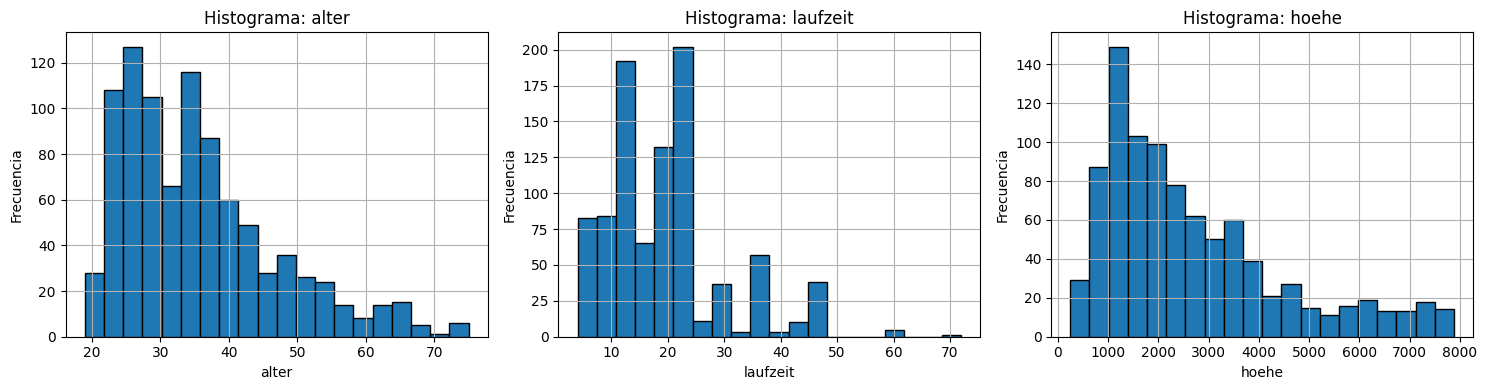

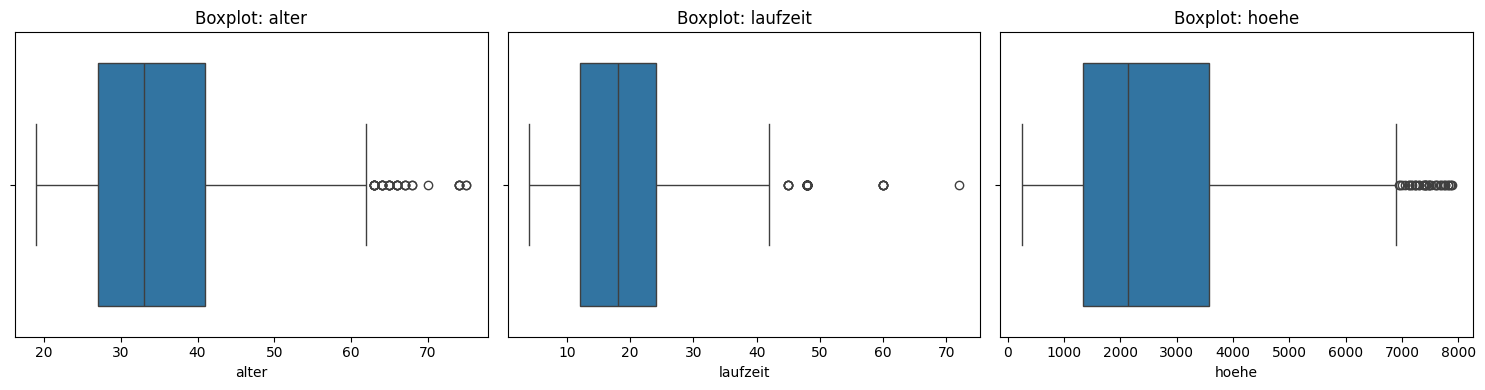

target_bad    1.000000
laufzeit      0.230866
verm          0.113935
rate          0.111665
gastarb       0.100970
hoehe         0.061424
verw          0.003789
beruf        -0.000394
pers         -0.003213
wohnzeit     -0.007259
wohn         -0.017413
buerge       -0.023309
bishkred     -0.056490
telef        -0.084897
alter        -0.088962
famges       -0.092299
weitkred     -0.117094
beszeit      -0.131159
sparkont     -0.164959
moral        -0.232796
laufkont     -0.348640
Name: target_bad, dtype: float64

Guardado: correlaciones vs target en /content/drive/MyDrive/OperacionesML/Fase1/artifacts/run_20251012_202156/corr_vs_target.csv


laufkont
4.0    383
1.0    249
2.0    230
3.0     61
Name: count, dtype: int64

moral
2.0    507
4.0    270
3.0     72
1.0     44
0.0     30
Name: count, dtype: int64

verw
3.0     290
0.0     206
2.0     172
9.0      85
1.0      79
6.0      43
5.0      20
4.0      12
8.0       9
10.0      7
Name: count, dtype: int64

sparkont
1.0    568
5.0    160
2.0     93
3.0     57
4.0     45
Name: count, dtype: int64

beszeit
3.0    329
5.0    227
2.0    158
4.0    156
1.0     53
Name: count, dtype: int64

rate
4.0    469
2.0    188
3.0    147
1.0    119
Name: count, dtype: int64

In [ ]:
import math


cont_cols = [c for c in ["alter","laufzeit","hoehe"] if c in df.columns]
cat_cols  = [c for c in VALID.keys() if c in df.columns]

# --- MODIFICADO: Histogramas en una rejilla de 3 columnas ---
n_cols = 3
n_rows = math.ceil(len(cont_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, c in enumerate(cont_cols):
    ax = axes[i]
    df[c].hist(ax=ax, bins=20, edgecolor="black")
    ax.set_title(f"Histograma: {c}")
    ax.set_xlabel(c); ax.set_ylabel("Frecuencia")

# Ocultar ejes no utilizados
for i in range(len(cont_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
# plt.savefig(RUN_DIR / "hists_continuas.png", bbox_inches="tight")
plt.show()


# --- MODIFICADO: Boxplots en una rejilla de 3 columnas ---
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, c in enumerate(cont_cols):
    ax = axes[i]
    sns.boxplot(x=df[c], ax=ax)
    ax.set_title(f"Boxplot: {c}")

# Ocultar ejes no utilizados
for i in range(len(cont_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
# plt.savefig(RUN_DIR / "boxplots_continuas.png", bbox_inches="tight")
plt.show()

# Correlaci√≥n con target
corr = df.corr(numeric_only=True)["target_bad"].sort_values(ascending=False)
display(corr)

corr.to_csv(RUN_DIR / "corr_vs_target.csv")
print("Guardado: correlaciones vs target en", RUN_DIR / "corr_vs_target.csv")

# Conteos de categ√≥ricas (muestra)
for c in cat_cols[:6]:
    vc = df[c].value_counts(dropna=False)
    display(vc)
    vc.to_csv(RUN_DIR / f"value_counts_{c}.csv")


Los histogramas y boxplots de las variables num√©ricas nos pintan un cuadro muy consistente:


*   Edad (alter): La mayor√≠a de los solicitantes son j√≥venes, concentrados principalmente entre los 20 y 40 a√±os. La distribuci√≥n est√° sesgada hacia la derecha, lo que significa que hay menos solicitantes a medida que la edad aumenta. Los outliers (puntos at√≠picos) en el boxplot confirman que hay algunas personas de edad avanzada, pero son la excepci√≥n.
*   Monto del Cr√©dito (hoehe): La gran mayor√≠a de los cr√©ditos solicitados son de montos bajos (probablemente menos de 3,000). La distribuci√≥n est√° fuertemente sesgada a la derecha, indicando que muy pocos cr√©ditos son por montos altos. Esto es t√≠pico en datos financieros.
*   Duraci√≥n del Cr√©dito (laufzeit): Los solicitantes prefieren plazos de corta a mediana duraci√≥n. Los picos en el histograma sugieren que los plazos m√°s populares son los est√°ndares, como 12, 24 y 36 meses. Al igual que las otras variables, est√° sesgada a la derecha, con algunos cr√©ditos a plazos muy largos que se consideran at√≠picos.


Conclusi√≥n Parcial: El solicitante t√≠pico es una persona joven que pide un pr√©stamo relativamente peque√±o a un plazo est√°ndar.

# Conclusiones Clave para el Modelo de Riesgo
Los Ahorros son un Factor Cr√≠tico: El hecho de que la mayor√≠a de los clientes tengan pocos ahorros es probablemente uno de los predictores m√°s fuertes de riesgo. Un solicitante sin un colch√≥n financiero es m√°s vulnerable a un impago si surge un imprevisto.

El Sesgo es la Norma: Todas tus variables num√©ricas est√°n sesgadas. Esto es importante porque algunos modelos de machine learning funcionan mejor si los datos se asemejan a una distribuci√≥n normal. Podr√≠as necesitar aplicar transformaciones (como la transformaci√≥n logar√≠tmica) al monto del cr√©dito (hoehe) m√°s adelante.

Tensi√≥n entre Estabilidad y Riesgo: Existe una interesante dualidad: los solicitantes suelen tener empleos estables, pero al mismo tiempo tienen pocos ahorros y aceptan altas tasas de pago. Tu modelo deber√° aprender a ponderar estos factores opuestos para determinar el riesgo real.

Los Outliers son Relevantes: Los boxplots muestran claramente que existen solicitantes con edades, montos y plazos de cr√©dito muy por encima de la media. Es importante que tu modelo sea robusto frente a estos outliers o que decidas c√≥mo tratarlos.

## Outliers IQR (reporte, sin modificar datos)
detectar y contar los valores at√≠picos (outliers) en las columnas num√©ricas

In [ ]:
def iqr_bounds(s, min_floor=None):
    q1,q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    if min_floor is not None:
        low = max(low, min_floor)
    return low, high

out_report = {}
for c in cont_cols:
    low, high = iqr_bounds(df[c].dropna(), min_floor=RANGE.get(c,(None,None))[0])
    cnt = int(((df[c] < low) | (df[c] > high)).sum())
    out_report[c] = {"low":float(low), "high":float(high), "outliers":cnt}
out_path = RUN_DIR / "outliers_iqr.json"
json.dump(out_report, open(out_path,"w"), indent=2)
print(json.dumps(out_report, indent=2))
print("Guardado:", out_path)


{
  "alter": {
    "low": 18.0,
    "high": 62.0,
    "outliers": 34
  },
  "laufzeit": {
    "low": 4.0,
    "high": 42.0,
    "outliers": 44
  },
  "hoehe": {
    "low": 250.0,
    "high": 6915.75,
    "outliers": 36
  }
}
Guardado: /content/drive/MyDrive/OperacionesML/Fase1/artifacts/run_20251012_202156/outliers_iqr.json



*   Para alter (Edad):

El rango de edad considerado "normal" por este m√©todo es entre 18.0 y 62.0 a√±os.

Se encontraron 34 solicitantes con una edad superior a 62, los cuales son marcados como valores at√≠picos.

*   Para laufzeit (Duraci√≥n del Cr√©dito):

El rango de duraci√≥n "normal" es entre 4.0 y 42.0 meses.

Se encontraron 44 cr√©ditos con una duraci√≥n mayor a 42 meses (m√°s de 3.5 a√±os), que son considerados at√≠picos.
*   Para hoehe (Monto del Cr√©dito):

El rango de monto "normal" es entre 250.0 y 6,915.75.

Se encontraron 36 pr√©stamos solicitados por un monto superior a 6,915.75, marc√°ndolos como at√≠picos.







## Preprocesamiento (imputaci√≥n simple + escalado) y split

In [ ]:
# Copia para asegurar 0 duplicados
df2 = df.drop_duplicates().copy()

# --- Imputaci√≥n SOLO en features (no tocar el target) ---
for col in df2.columns:
    if col == "target_bad":
        continue
    if col in cont_cols:          # continuas: mediana
        df2[col] = df2[col].fillna(df2[col].median())
    else:                         # categ√≥ricas: moda
        moda = df2[col].mode(dropna=True)
        if not moda.empty:
            df2[col] = df2[col].fillna(moda.iloc[0])

# --- Asegurar que el target sea v√°lido (0/1) y sin NaN ---
n_target_na = int(df2["target_bad"].isna().sum())
if n_target_na > 0:
    print(f"Eliminando {n_target_na} filas con target_bad = NaN")
    df2 = df2.dropna(subset=["target_bad"]).copy()

vals = set(df2["target_bad"].unique())
if not vals <= {0, 1}:
    raise ValueError(f"Valores no binarios en target_bad: {sorted(vals)}")

print("NA totales tras imputaci√≥n (solo features):", int(df2.drop(columns=["target_bad"]).isna().sum().sum()))

# --- Construir X, y ---
X = df2.drop(columns=["target_bad"])
y = df2["target_bad"].astype("int64")   # ya no debe fallar

# --- Escalado solo en continuas ---
scaler = StandardScaler()
X_scaled = X.copy()
if cont_cols:
    X_scaled[cont_cols] = scaler.fit_transform(X_scaled[cont_cols])

# --- Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE
)
print("Train:", X_train.shape, " Test:", X_test.shape)
print("Distribuci√≥n y:", y.value_counts(normalize=True).round(3).to_dict())

# --- Guardar dataset listo ---
ready = X_scaled.copy()
ready["target_bad"] = y.values
ready_path = DATA_DIR / "analysis_ready.csv" #dataset listo para entrenamiento
ready.to_csv(ready_path, index=False)
print("[OK] analysis_ready ->", ready_path)



Eliminando 23 filas con target_bad = NaN
NA totales tras imputaci√≥n (solo features): 0
Train: (675, 20)  Test: (225, 20)
Distribuci√≥n y: {0: 0.717, 1: 0.283}
[OK] analysis_ready -> /content/drive/MyDrive/OperacionesML/Fase1/data/interim/analysis_ready.csv


## Interaci√≥n con DVC

In [ ]:
!pip -q install mlflow==2.16.0 dvc[gdrive]==3.55.2 dvc[s3]==3.55.2 scikit-learn==1.5.2 pyyaml==6.0.2

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.6/26.6 MB 57.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 455.1/455.1 kB 31.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.9/12.9 MB 81.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 767.5/767.5 kB 40.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.6/5.6 MB 89.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 147.8/147.8 kB 10.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
import pathlib
pathlib.Path(BASE).mkdir(parents=True, exist_ok=True)
os.chdir(BASE)
!pwd

/content/drive/MyDrive/OperacionesML/Fase1


In [ ]:
%%bash
dvc remote add -d gdrive gdrive://1E494khYq8ookdJWNncl7o2j6vHrlDHvg
git add .dvc/config
git commit -m "add dvc remote gdrive"

In [ ]:
%%bash
cat > params.yaml << 'EOF'
data:
  raw_path: data/raw/german_credit_modified.csv
  clean_path: data/interim/analysis_ready.csv
  processed_path: data/processed/train.csv
model:
  type: "RandomForestClassifier"   # tipo de modelo
  test_size: 0.2
  random_state: 42
  n_estimators: 300
  max_depth: null
  n_jobs: -1
  class_weight: "balanced"         # √∫til si hay desbalance
target: "target_bad"               # <- tu variable objetivo
features: []                       # si vac√≠o, usa todas menos target
experiment_name: "fase1-colab-mlflow"
EOF

In [ ]:
%%bash
mkdir -p src notebooks models

In [ ]:
%%bash
cat > src/utils.py << 'PY'
import yaml
from pathlib import Path

def load_params(path: str = "params.yaml"):
    """Lee los par√°metros globales del proyecto."""
    with open(path, "r", encoding="utf-8") as f:
        return yaml.safe_load(f)

def ensure_parent(p: str):
    """Crea carpetas padre si no existen."""
    Path(p).parent.mkdir(parents=True, exist_ok=True)
PY

In [ ]:
%%bash
cat > src/preprocessing.py << 'PY'
import pandas as pd
from utils import load_params, ensure_parent

def make_trainset():
    """Toma el dataset limpio, aplica transformaciones y genera el dataset procesado."""
    P = load_params()
    clean_path = P["data"]["clean_path"]
    out_path = P["data"]["processed_path"]
    target = P["target"]
    feats = P.get("features") or []

    # Cargar dataset limpio (ya depurado en tu EDA)
    df = pd.read_csv(clean_path)

    # Si no hay lista de features, usar todas menos la variable objetivo
    if not feats:
        feats = [c for c in df.columns if c != target]

    # Aqu√≠ podr√≠as agregar transformaciones extra si lo necesitas
    # Ejemplo: encoding, normalizaci√≥n, etc.
    # df = pd.get_dummies(df, drop_first=True)

    # Guardar dataset final procesado
    ensure_parent(out_path)
    df[feats + [target]].to_csv(out_path, index=False)
    print(f"‚úÖ Dataset procesado guardado en: {out_path}")

if __name__ == "__main__":
    make_trainset()
PY

In [ ]:
!python src/preprocessing.py

‚úÖ Dataset procesado guardado en: data/processed/train.csv


In [ ]:
%%bash
git add data/raw/german_credit_modified.csv data/interim/german_credit_clean.csv src params.yaml
git commit -m "add initial data and preprocessing pipeline"

[master f1f66c5] add initial data and preprocessing pipeline
 2 files changed, 1 insertion(+), 1 deletion(-)


## Baseline: Regresi√≥n Log√≠stica (class_weight balanced)

Este c√≥digo entrena un modelo base de Regresi√≥n Log√≠stica, lo eval√∫a a fondo y guarda los resultados.

Baseline (LogReg) ROC-AUC: 0.8625776397515528
Baseline (LogReg) PR-AUC : 0.7284255931959087

Classification report:
              precision    recall  f1-score   support

           0      0.910     0.752     0.823       161
           1      0.565     0.812     0.667        64

    accuracy                          0.769       225
   macro avg      0.737     0.782     0.745       225
weighted avg      0.812     0.769     0.779       225

Confusion matrix:
 [[121  40]
 [ 12  52]]


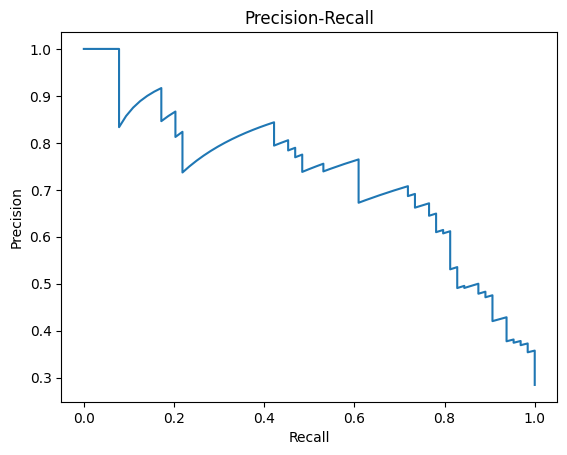

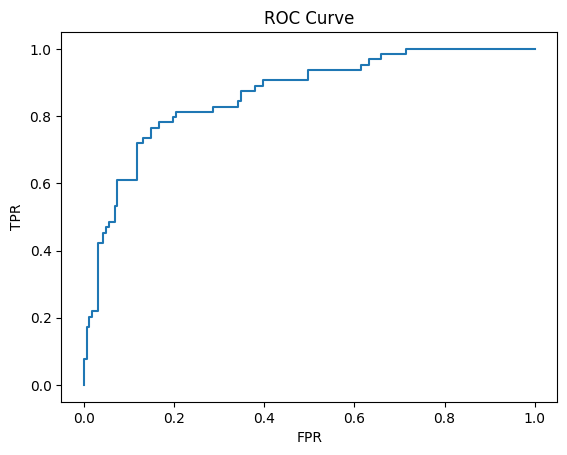

Guardado modelo y m√©tricas en /content/drive/MyDrive/OperacionesML/Fase1/artifacts/run_20251012_202156


In [ ]:
logit = LogisticRegression(max_iter=200, class_weight="balanced", random_state=RANDOM_STATE)
logit.fit(X_train, y_train)

proba = logit.predict_proba(X_test)[:,1]
pred  = (proba >= 0.5).astype(int)

metrics = {
    "roc_auc": float(roc_auc_score(y_test, proba)),
    "pr_auc": float(average_precision_score(y_test, proba)),
}
print("Baseline (LogReg) ROC-AUC:", metrics["roc_auc"])
print("Baseline (LogReg) PR-AUC :", metrics["pr_auc"])

print("\nClassification report:")
print(classification_report(y_test, pred, digits=3))

cm = confusion_matrix(y_test, pred)
print("Confusion matrix:\n", cm)

# Curvas y figuras
prec, rec, thr = precision_recall_curve(y_test, proba)
plt.plot(rec, prec); plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall")
plt.savefig(RUN_DIR / "pr_curve_logit.png", bbox_inches="tight"); plt.show()

fpr, tpr, _ = roc_curve(y_test, proba)
plt.plot(fpr, tpr); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve")
plt.savefig(RUN_DIR / "roc_curve_logit.png", bbox_inches="tight"); plt.show()

# Guardar m√©tricas y modelo
json.dump(metrics, open(RUN_DIR / "metrics_logit.json","w"), indent=2)
joblib.dump(logit, RUN_DIR / "model_logit.joblib")
print("Guardado modelo y m√©tricas en", RUN_DIR)



*   Curva Precision-Recall

Esta curva muestra el compromiso (trade-off) del mundo real.

A la izquierda (bajo Recall), la precisi√≥n es alta. Esto significa que cuando el modelo est√° muy seguro de que alguien es un mal pagador, casi siempre acierta. Sin embargo, en este punto solo est√° identificando a unos pocos de todos los malos pagadores que existen.
*   Curva ROC

El modelo tiene una excelente capacidad para discriminar entre un cliente bueno y uno malo.








## Modelo 2: Random Forest + GridSearchCV (ajuste de hiperpar√°metros)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores params RF: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejor score CV (PR-AUC): 0.6299448723592913
RF ROC-AUC: 0.8497670807453417
RF PR-AUC : 0.7000063752344102

Classification report (RF):
              precision    recall  f1-score   support

           0      0.855     0.845     0.850       161
           1      0.621     0.641     0.631        64

    accuracy                          0.787       225
   macro avg      0.738     0.743     0.740       225
weighted avg      0.789     0.787     0.788       225

Confusion matrix (RF):
 [[136  25]
 [ 23  41]]


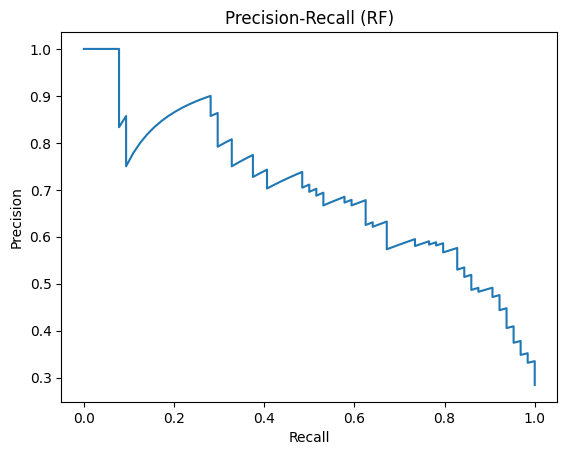

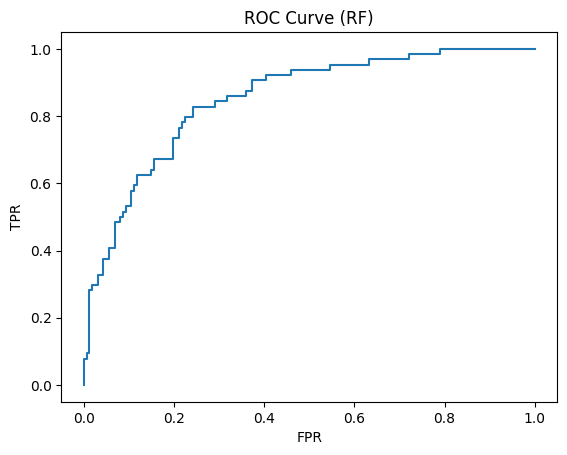

Guardado RF y m√©tricas en /content/drive/MyDrive/OperacionesML/Fase1/artifacts/run_20251012_202156


In [ ]:
rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, class_weight="balanced")
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 8, 12],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
g = GridSearchCV(rf, param_grid, scoring="average_precision", cv=cv, n_jobs=-1, verbose=1)
g.fit(X_train, y_train)

best_rf = g.best_estimator_
print("Mejores params RF:", g.best_params_)
print("Mejor score CV (PR-AUC):", g.best_score_)

proba_rf = best_rf.predict_proba(X_test)[:,1]
pred_rf  = (proba_rf >= 0.5).astype(int)

metrics_rf = {
    "roc_auc": float(roc_auc_score(y_test, proba_rf)),
    "pr_auc": float(average_precision_score(y_test, proba_rf)),
}
print("RF ROC-AUC:", metrics_rf["roc_auc"])
print("RF PR-AUC :", metrics_rf["pr_auc"])
print("\nClassification report (RF):")
print(classification_report(y_test, pred_rf, digits=3))

cm_rf = confusion_matrix(y_test, pred_rf)
print("Confusion matrix (RF):\n", cm_rf)

# Figuras
prec, rec, thr = precision_recall_curve(y_test, proba_rf)
plt.plot(rec, prec); plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall (RF)")
plt.savefig(RUN_DIR / "pr_curve_rf.png", bbox_inches="tight"); plt.show()

fpr, tpr, _ = roc_curve(y_test, proba_rf)
plt.plot(fpr, tpr); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve (RF)")
plt.savefig(RUN_DIR / "roc_curve_rf.png", bbox_inches="tight"); plt.show()

# Guardado
json.dump({"best_params": g.best_params_, "cv_best_pr_auc": g.best_score_},
          open(RUN_DIR / "rf_tuning_summary.json","w"), indent=2)
json.dump(metrics_rf, open(RUN_DIR / "metrics_rf.json","w"), indent=2)
joblib.dump(best_rf, RUN_DIR / "model_rf.joblib")
print("Guardado RF y m√©tricas en", RUN_DIR)


Observa c√≥mo la curva empieza en Precision = 1.0 y se mantiene ah√≠ por un tramo. Esto es muy valioso y significa que el modelo es capaz de identificar un grupo de solicitantes (aproximadamente el 10% de los malos pagadores) con una precisi√≥n pr√°cticamente perfecta.

## Comparaci√≥n de modelos

In [ ]:
m_log = json.load(open(RUN_DIR / "metrics_logit.json"))
m_rf  = json.load(open(RUN_DIR / "metrics_rf.json"))

comp = pd.DataFrame([
    {"modelo":"LogReg", "roc_auc":m_log["roc_auc"], "pr_auc":m_log["pr_auc"]},
    {"modelo":"RandomForest", "roc_auc":m_rf["roc_auc"], "pr_auc":m_rf["pr_auc"]},
]).sort_values("pr_auc", ascending=False)
display(comp)

comp.to_csv(RUN_DIR / "models_comparison.csv", index=False)

# Model card m√≠nima
card = f"""
# Model Card ‚Äî German Credit (run {RUN_ID})

## Datos
- Fuente: german_credit_clean.csv
- Tama√±o: {df.shape}
- Target: target_bad (1=riesgo alto)

## Preprocesamiento
- Imputaci√≥n simple (mediana/mode).
- Escalado: StandardScaler en continuas (alter, laufzeit, hoehe).
- Split: 75/25 estratificado, random_state={RANDOM_STATE}.

## Modelos
- Baseline: LogisticRegression(class_weight='balanced').
- Tuning: RandomForest (GridSearchCV, PR-AUC).

## M√©tricas (test)
- LogReg PR-AUC={m_log['pr_auc']:.3f}, ROC-AUC={m_log['roc_auc']:.3f}
- RF     PR-AUC={m_rf['pr_auc']:.3f}, ROC-AUC={m_rf['roc_auc']:.3f}

## Versionado
- Dataset listo: processed/analysis_ready.csv
- Artefactos del run: artifacts/run_{RUN_ID}/
"""
(Path(RUN_DIR) / "MODEL_CARD.md").write_text(textwrap.dedent(card), encoding="utf-8")
print("Guardado MODEL_CARD.md en", RUN_DIR)


modelo   roc_auc    pr_auc
0        LogReg  0.862578  0.728426
1  RandomForest  0.849767  0.700006

Guardado MODEL_CARD.md en /content/drive/MyDrive/OperacionesML/Fase1/artifacts/run_20251012_202156


### An√°lisis por M√©trica:


*   PR-AUC (La m√°s importante aqu√≠): La Regresi√≥n Log√≠stica (0.728) tiene un mejor balance general entre precisi√≥n y recall que el Random Forest (0.700).
*   ROC-AUC: La Regresi√≥n Log√≠stica (0.863) tambi√©n muestra una capacidad ligeramente superior para distinguir entre clientes buenos y malos en comparaci√≥n con el Random Forest (0.850).







## Guardar snapshot de datos para DVC

In [ ]:
# Copiamos una versi√≥n ‚Äúcongelada‚Äù del dataset listo
snap_dir = DVC_DIR / f"snapshot_{RUN_ID}"
snap_dir.mkdir(parents=True, exist_ok=True)
ready = pd.read_csv(DATA_DIR / "analysis_ready.csv")
ready.to_csv(snap_dir / "analysis_ready.csv", index=False)
print("Snapshot para DVC en:", snap_dir)


Snapshot para DVC en: /content/drive/MyDrive/OperacionesML/Fase1/data/snapshot_20251012_202156


In [ ]:
changelog = {
    "run_id": RUN_ID,
    "timestamp": datetime.now().isoformat(),
    "data_input": str(IN_FILE),
    "data_ready": str(DATA_DIR / "analysis_ready.csv"),
    "artifacts_dir": str(RUN_DIR),
    "notes": "EDA + preprocesamiento + baseline + RF tuning; se guardaron m√©tricas y figuras.",
}
LOG = BASE / "CHANGELOG.jsonl"
with open(LOG, "a", encoding="utf-8") as f:
    f.write(json.dumps(changelog, ensure_ascii=False) + "\n")
print("Actualizado:", LOG)


Actualizado: /content/drive/MyDrive/OperacionesML/Fase1/CHANGELOG.jsonl


In [ ]:
roles_log = """
# Roles e Interacciones (run {run})
- Data Engineer: ingesti√≥n, validaci√≥n de dominios/rangos, DVC, pipelines de datos.
- Data Analyst: EDA, visualizaciones, hallazgos y reportes IQR.
- ML Engineer: preprocesamiento (escala/OHE), training, tuning, evaluaci√≥n y artefactos.
- PM: defini√≥ criterios de √©xito (PR-AUC > 0.70), prioriz√≥ interpretabilidad.
""".format(run=RUN_ID)

(Path(RUN_DIR) / "ROLES.md").write_text(roles_log, encoding="utf-8")
print("Guardado ROLES.md")


Guardado ROLES.md



## Integraci√≥n de MLFlow


In [ ]:
%%bash
ls -lh data/processed || true
head -n 3 data/processed/train.csv || true

total 240K
-rw------- 1 root root 114K Oct 12 20:20 analysis_ready.csv
-rw------- 1 root root  46K Oct  2 23:31 german_credit_original.csv
-rw------- 1 root root  81K Oct 12 20:25 train.csv
laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,target_bad
1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,4.0,2.0,21.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,0.0
1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,2.0,1.0,36.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,0.0


In [ ]:
%%bash
cat > src/train.py << 'PY'
import os
import json
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
    classification_report, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from utils import load_params

def plot_curves(y_true, y_score, model_name, outdir):
    """Dibuja curvas ROC y PR y devuelve aucs."""
    fpr, tpr, _ = roc_curve(y_true, y_score)
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)
    pr_auc = average_precision_score(y_true, y_score)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC AUC={roc_auc:.4f}")
    plt.plot([0,1],[0,1],'--',color='gray')
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title(f"ROC - {model_name}")
    plt.legend(); plt.tight_layout()
    roc_path = os.path.join(outdir, f"{model_name}_roc_curve.png")
    plt.savefig(roc_path); plt.close()

    plt.figure()
    plt.plot(recall, precision, label=f"PR AUC={pr_auc:.4f}")
    plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title(f"PR Curve - {model_name}")
    plt.legend(); plt.tight_layout()
    pr_path = os.path.join(outdir, f"{model_name}_pr_curve.png")
    plt.savefig(pr_path); plt.close()

    return roc_auc, pr_auc, roc_path, pr_path

def main():
    P = load_params()
    data_path = P["data"]["processed_path"]
    target = P["target"]
    df = pd.read_csv(data_path)

    X = df.drop(columns=[target])
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    mlruns_path = os.path.abspath("mlruns")
    os.environ["MLFLOW_TRACKING_URI"] = f"file:{mlruns_path}"
    mlflow.set_experiment("model_comparison")

    results = []

    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "RandomForest": RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=42)
    }

    for name, model in models.items():
        with mlflow.start_run(run_name=name):
            mlflow.log_param("model_name", name)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:,1]

            # Reporte y matriz
            report = classification_report(y_test, y_pred, output_dict=True)
            cm = confusion_matrix(y_test, y_pred)

            # ROC/PR curves
            os.makedirs("artifacts", exist_ok=True)
            roc_auc, pr_auc, roc_path, pr_path = plot_curves(y_test, y_prob, name, "artifacts")

            # Guarda artefactos visuales
            mlflow.log_artifact(roc_path)
            mlflow.log_artifact(pr_path)

            # Matriz de confusi√≥n visual
            plt.figure(figsize=(4,3))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
            plt.title(f"Confusion Matrix - {name}")
            plt.xlabel("Predicted"); plt.ylabel("True")
            cm_path = f"artifacts/{name}_confusion_matrix.png"
            plt.tight_layout(); plt.savefig(cm_path); plt.close()
            mlflow.log_artifact(cm_path)

            # Reporte de clasificaci√≥n
            report_df = pd.DataFrame(report).transpose()
            report_path = f"artifacts/{name}_classification_report.csv"
            report_df.to_csv(report_path)
            mlflow.log_artifact(report_path)

            # M√©tricas
            mlflow.log_metric("roc_auc", roc_auc)
            mlflow.log_metric("pr_auc", pr_auc)
            mlflow.log_metric("f1_score", report["weighted avg"]["f1-score"])
            mlflow.log_metric("precision", report["weighted avg"]["precision"])
            mlflow.log_metric("recall", report["weighted avg"]["recall"])

            results.append({
                "Modelo": name,
                "ROC_AUC": roc_auc,
                "PR_AUC": pr_auc,
                "F1": report["weighted avg"]["f1-score"]
            })

    # Comparaci√≥n final
    comp_df = pd.DataFrame(results)
    comp_df["Ganador"] = comp_df.apply(lambda x: "üèÜ" if x["ROC_AUC"] == comp_df["ROC_AUC"].max() else "", axis=1)
    comp_path = "artifacts/model_comparison.csv"
    comp_df.to_csv(comp_path, index=False)
    mlflow.log_artifact(comp_path)
    print("\nTabla comparativa:\n", comp_df)

if __name__ == "__main__":
    main()
PY

In [ ]:
%%bash
dvc stage add -n train \
  -p model.type,model.test_size,model.random_state,model.n_estimators,model.max_depth,model.n_jobs,model.class_weight,target,features \
  -d src/train.py -d data/processed/train.csv \
  -o models \
  python src/train.py

Added stage 'train' in 'dvc.yaml'

To track the changes with git, run:

	git add .gitignore dvc.yaml

To enable auto staging, run:

	dvc config core.autostage true


In [ ]:
%%bash
git add .gitignore dvc.yaml
git commit -m "chore: update .gitignore and add dvc.yaml"

[master c946025] chore: update .gitignore and add dvc.yaml
 2 files changed, 19 insertions(+)
 create mode 100644 dvc.yaml


In [ ]:
%%bash
dvc repro

Running stage 'train':
> python src/train.py
Run: 4a666f1ea9264e33a759f7b00bcd86bf | ACC=0.7833 F1=0.4935 ROC_AUC=0.8604 GMean=0.5936
Generating lock file 'dvc.lock'
Updating lock file 'dvc.lock'

To track the changes with git, run:

	git add dvc.lock

To enable auto staging, run:

	dvc config core.autostage true
Use `dvc push` to send your updates to remote storage.


2025/10/12 20:57:37 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


In [ ]:
%%bash
dvc push

Process is terminated.


In [ ]:
%%bash
git add dvc.lock
git commit -m "add lockfile after first repro"

[master 4789dcc] add lockfile after first repro
 1 file changed, 30 insertions(+)
 create mode 100644 dvc.lock


In [ ]:
!mlflow ui --backend-store-uri file:./mlruns --port 5001 --host 0.0.0.0 &

[2025-10-12 21:21:59 +0000] [23137] [INFO] Starting gunicorn 23.0.0
[2025-10-12 21:21:59 +0000] [23137] [INFO] Listening at: http://0.0.0.0:5001 (23137)
[2025-10-12 21:21:59 +0000] [23137] [INFO] Using worker: sync
[2025-10-12 21:21:59 +0000] [23138] [INFO] Booting worker with pid: 23138
[2025-10-12 21:21:59 +0000] [23143] [INFO] Booting worker with pid: 23143
[2025-10-12 21:21:59 +0000] [23144] [INFO] Booting worker with pid: 23144
[2025-10-12 21:22:00 +0000] [23145] [INFO] Booting worker with pid: 23145
[2025-10-12 21:22:25 +0000] [23137] [INFO] Handling signal: int
[2025-10-12 21:22:25 +0000] [23144] [INFO] Worker exiting (pid: 23144)
[2025-10-12 21:22:25 +0000] [23138] [INFO] Worker exiting (pid: 23138)
[2025-10-12 21:22:25 +0000] [23143] [INFO] Worker exiting (pid: 23143)
[2025-10-12 21:22:25 +0000] [23145] [INFO] Worker exiting (pid: 23145)
[2025-10-12 21:22:26 +0000] [23137] [INFO] Shutting down: Master


In [ ]:
import os
from pyngrok import ngrok

public_url = ngrok.connect(5001)
print("üåê Interfaz MLflow disponible en:", public_url)

üåê Interfaz MLflow disponible en: NgrokTunnel: "https://rudaceous-zahra-unfeasted.ngrok-free.dev" -> "http://localhost:5001"


In [ ]:
%%bash
python src/train.py


Tabla comparativa:
                Modelo   ROC_AUC    PR_AUC        F1 Ganador
0  LogisticRegression  0.883265  0.761576  0.814321       üèÜ
1        RandomForest  0.860389  0.685082  0.757730        


In [ ]:
%%bash
git log --oneline --graph --decorate --all

* b9c90f5 (HEAD -> main) push desde Colab (master)
* f73b62d chore: ignore gsheet/mlruns/artifacts; commit code & pipeline
* 4789dcc add lockfile after first repro
* c946025 chore: update .gitignore and add dvc.yaml
* 00fc25e ignore models dir
* f1f66c5 add initial data and preprocessing pipeline
* 73237f0 add initial data and preprocessing pipeline
* 9279950 add initial data and preprocessing pipeline
* e93e8f0 add initial data and preprocessing pipeline
* 792506c add dvc remote gdrive
* 5b59028 init repo + dvc


In [ ]:
%%bash
cd /content/drive/MyDrive/OperacionesML/Fase1
git remote set-url origin https://github.com/ManuelAmbrizTec/riesgo_crediticio_equipo14.git
git remote -v

origin	https://github.com/ManuelAmbrizTec/riesgo_crediticio_equipo14.git (fetch)
origin	https://github.com/ManuelAmbrizTec/riesgo_crediticio_equipo14.git (push)


In [ ]:
!git branch -M main
!git push -u origin main